<a href="https://colab.research.google.com/github/Kabyl-lite/ML_projects/blob/main/Img_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Keras start
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
### Importing dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print(f"Training images shape:{x_train.shape}")
print(f"Training labels shape:{y_train.shape}")
print(f"Testing images shape:{x_test.shape}")
print(f"Testing labels shape:{x_test.shape}")

Training images shape:(50000, 32, 32, 3)
Training labels shape:(50000, 1)
Testing images shape:(10000, 32, 32, 3)
Testing labels shape:(10000, 32, 32, 3)


In [ ]:
NUM_CLASSES = 10

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

<function matplotlib.pyplot.show(close=None, block=None)>

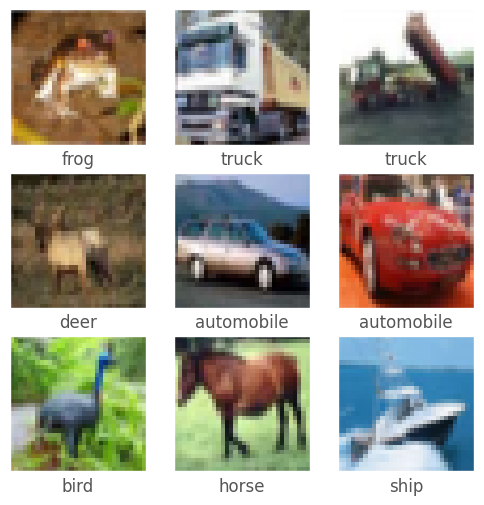

In [ ]:
## Visualize the dataset
plt.figure(figsize=(6, 6))

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i])
  plt.xlabel(classes[y_train[i].item()])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

plt.show

In [ ]:
##normalizing the images
x_train = x_train.astype('float32')/ 255
x_test = x_test.astype('float32')/ 255

In [ ]:
x_train[0].dtype, x_train[0].max(), x_train[0].min()

(dtype('float32'), 1.0, 0.0)

In [ ]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test= to_categorical(y_test, NUM_CLASSES)

In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(
    filters= 32,
    kernel_size= (3, 3),
    strides= (1, 1),
    padding='same',
    activation= 'relu',
    input_shape=(32, 32, 3)
))

In [ ]:
model.add(
    MaxPool2D(pool_size= (2, 2),
              padding= 'same',)
)

In [ ]:
model.add(
    MaxPool2D(pool_size= (2, 2),
              padding='same',)
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.add(
    MaxPool2D(2, 2))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
________________________

In [ ]:
model.add(Conv2D( 64, (3,3), activation= 'relu', padding='same'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          18496     
                                                      

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          18496     
                                                      

In [ ]:
model.layers[-1].output.shape

TensorShape([None, 1024])

In [ ]:
model.add(Dense(256, activation= 'relu'))
model.add(Dense(NUM_CLASSES, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          18496     
                                                      

In [ ]:
optimizer= Adam(learning_rate=0.01)

In [ ]:
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          18496     
                                                      

In [ ]:
NUM_EPOCHS = 50
BATCH_SIZE = 128

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs= NUM_EPOCHS,
    batch_size = BATCH_SIZE,
    shuffle=True,
    validation_data=(x_test,y_test)
)

Epoch 1/50
391/391 [==============================] - 5s 9ms/step - loss: 1.7197 - accuracy: 0.3682 - val_loss: 1.4872 - val_accuracy: 0.4651
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.4088 - accuracy: 0.4933 - val_loss: 1.3545 - val_accuracy: 0.5163
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.3266 - accuracy: 0.5250 - val_loss: 1.2928 - val_accuracy: 0.5393
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.2685 - accuracy: 0.5458 - val_loss: 1.2569 - val_accuracy: 0.5551
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.2321 - accuracy: 0.5625 - val_loss: 1.2820 - val_accuracy: 0.5481
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.2065 - accuracy: 0.5704 - val_loss: 1.2853 - val_accuracy: 0.5481
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.1838 - accuracy: 0.5777 - val_loss: 1.2965 - val_accuracy: 0.5423
Epoch 

In [ ]:
def plot_history(history):
  fig=plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy of model')
  plt.xlabel("Epochs")
  plt.ylabel('Accuracy')
  plt.grid(False)
  plt.legend(['train','test'],loc='lower right')

  plt.subplot(1,2,2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss of model')
  plt.xlabel("Epochs")
  plt.ylabel('Loss')
  plt.grid(False)
  plt.legend(['train','test'],loc='upper right')


  plt.tight_layout()
  fig.show()

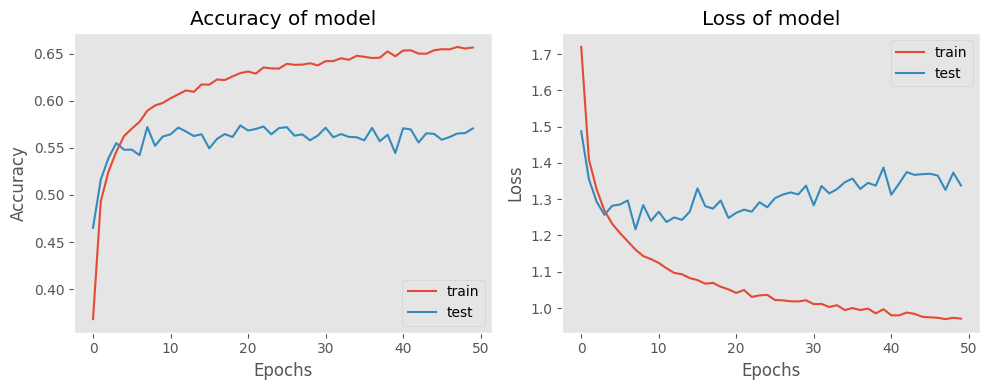

In [ ]:
plot_history(history)

In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPool2D((2, 2)))

In [ ]:
model2.add(Conv2D(64, (3, 3), padding = 'same', activation= 'relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.3))

In [ ]:
model2.add(Conv2D(64, (3, 3), padding = 'same', activation= 'relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.3))

In [ ]:
model2.add(Flatten())

model.add(Dense(256, activation= 'relu'))
model2.add(Dropout(0.3))

model2.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 64)         

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
def simple_decay(epoch, lr):
    if epoch < 30:
        lrate = lr
    elif epoch < 60:
        lrate = 0.0005
    else:
        lrate =  0.0001
    return lrate

In [ ]:
scheduler = LearningRateScheduler(simple_decay)

In [ ]:
callbacks= [scheduler]

In [ ]:
optimizer= Adam(learning_rate=0.0001)

In [ ]:
model2.compile(
    optimizer= optimizer,
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history2 = model2.fit(
    x_train,
    y_train,
    epochs=100,
    shuffle=True,
    validation_data=(x_test,y_test),
    callbacks=callbacks
)

Epoch 1/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5260 - accuracy: 0.8135 - val_loss: 0.6005 - val_accuracy: 0.7932 - lr: 1.0000e-04
Epoch 2/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5259 - accuracy: 0.8132 - val_loss: 0.6004 - val_accuracy: 0.7951 - lr: 1.0000e-04
Epoch 3/100
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5238 - accuracy: 0.8140 - val_loss: 0.6057 - val_accuracy: 0.7935 - lr: 1.0000e-04
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5241 - accuracy: 0.8150 - val_loss: 0.5999 - val_accuracy: 0.7946 - lr: 1.0000e-04
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5224 - accuracy: 0.8143 - val_loss: 0.6019 - val_accuracy: 0.7931 - lr: 1.0000e-04
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5260 - accuracy: 0.8142 - val_loss: 0.6005 - val_accuracy: 0.7953 - lr: 1.0000e-04
Epoch 7/100
1563/1563 [===

In [ ]:
plot_history(history2)